# Library import

In [1]:
#For csv importing, dataframe handling and transformation:
import pandas as pd
import numpy as np

#For visualizations:
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

#For cross validation:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

#For logistic regression model:
from sklearn.linear_model import LogisticRegression

#For transforming categorical into numerical data:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#For decision region of logistic regression predictions plot:
from mlxtend.plotting import plot_decision_regions

#Standardizing / scaling the variables:
from sklearn.preprocessing import StandardScaler

#For evaluation of logistic regression model:
from sklearn.metrics import f1_score

#Roc curve plotting:
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve

#Confusion matrix visualization:
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Seaborn version: {sns.__version__}')

Pandas version: 1.2.0
Numpy version: 1.19.5
Seaborn version: 0.11.1


In [3]:
ambev = pd.read_json('dataset.json')

In [4]:
ambev

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204423,141,0,0,78,2017-02-15T00:00:00Z,1481.02,18922,12,2624,235.19,19.03,0,0,0.0
204424,31,0,0,181,2018-05-23T00:00:00Z,1105.38,24146,1,844,100.81,100.81,0,0,0.0
204425,192,0,0,253,2014-10-20T00:00:00Z,1059.66,13285,3,1785,51.08,15.18,0,0,0.0
204426,687,0,0,190,2015-08-18T00:00:00Z,3167.71,15167,4,1412,230.32,50.56,0,0,0.0


In [5]:
ambev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_code     204428 non-null  int64  
 1   branch_id         204428 non-null  int64  
 2   sales_channel     204428 non-null  int64  
 3   seller_code       204428 non-null  int64  
 4   register_date     204428 non-null  object 
 5   total_price       204428 non-null  float64
 6   order_id          204428 non-null  int64  
 7   quantity          204428 non-null  int64  
 8   item_code         204428 non-null  int64  
 9   item_total_price  204428 non-null  float64
 10  unit_price        204428 non-null  float64
 11  group_code        204428 non-null  int64  
 12  segment_code      204428 non-null  int64  
 13  is_churn          202513 non-null  float64
dtypes: float64(4), int64(9), object(1)
memory usage: 21.8+ MB


Here’s the description of each column:

 customer_code: unique id of a customer;

 branch_id: the branch id where this order was made;

 sales_channel: the sales channel this order was made;

 seller_code: seller that made this order;

 register_date: date of the order;

 total_price: total price of the order (sum of all items);

 order_id: id of this order. A order is formed by a set of items;

 item_code: code of the item;

 quantity: quantity of items, given by item_code, were bought;

 item_total_price: total price of items, i.e., quantity* price;

 unit_price: unit price of this item;

 group_code: which group this customer belongs;

 segment_code: segment this client belongs;

 is_churn: True, if we believe the client will not come back. For a given customer_code this value is always the same, it means that "today" (the day you are doing this test) this client is a churn.

# Question 1 (10 Points):

List as many use cases for the dataset as possible.

- We could make a top customers (customer_code) chart (in total_price, or count(order_id)) and understand what these customers buy (item_code) in order to market these products to others
- We could make a recommendation model (memory-based) based on client taste similarity ("collaborative filtering") to match customers with similar taste and suggest each other products they haven't bought yet.
- We could check the variation of sales (a boxplot) of each type of sales channel to see which channel is the busiest for selling (sales_channel and total_price)
- We could check the sellers (seller_code) which have the highest churn rate (is_churn) so we could verify sellers who are not good for our business. We could also check the products related to those churn.
- We could reclassify our clients according to their products based on a clustering model.
-*__We could do a ML model to predict the churn customers that are missing in our database.__*

# Question 2 (10 Points):

Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve the business this data comes from.

- We are going to pick the case where we want to train the model and predict if a client will be churn or not, since we have missing values on that column. This could help us identifying which customers we need to focus our client satisfaction program actions. With the classification done, we can check any correlations between the churn rate and variables present in the purchase (like identifying if customers who buy few items are more likely to be churn).

# Question 3 (20 Points)

Implement the model you described in question 2, preferably in Python. The code has to retrieve the data, train and test a statistical model, and report relevant performance criteria. Ideally, we should be able to replicate your analysis from your submitted source-code, so please explicit the versions of the tools and packages you are using.

## Data wrangling

Checking for nulls and the data types.

In [6]:
ambev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   customer_code     204428 non-null  int64  
 1   branch_id         204428 non-null  int64  
 2   sales_channel     204428 non-null  int64  
 3   seller_code       204428 non-null  int64  
 4   register_date     204428 non-null  object 
 5   total_price       204428 non-null  float64
 6   order_id          204428 non-null  int64  
 7   quantity          204428 non-null  int64  
 8   item_code         204428 non-null  int64  
 9   item_total_price  204428 non-null  float64
 10  unit_price        204428 non-null  float64
 11  group_code        204428 non-null  int64  
 12  segment_code      204428 non-null  int64  
 13  is_churn          202513 non-null  float64
dtypes: float64(4), int64(9), object(1)
memory usage: 21.8+ MB


- *__register_date__* is in format of object instead of *__datetime__*
- *__is_churn__* is in float64 format instead of *__boolean__* (since there are two options)
    - Yes: is churn, the client won't come back
    - No: is not churn, the client will come back)
- *__is_churn__* has some nulls

In [7]:
print(ambev['is_churn'].value_counts())
print(ambev['is_churn'].dtype)

0.0    163799
1.0     38714
Name: is_churn, dtype: int64
float64


Also there are only values 0 for the branch_id.

In [8]:
ambev['branch_id'].value_counts()

0    204428
Name: branch_id, dtype: int64

### *register_date* data type correction

In [9]:
ambev['register_date'].dtype

dtype('O')

In [10]:
ambev['register_date'] = ambev['register_date'].astype('datetime64')

In [11]:
ambev

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17,1736.48,4730,5,1786,66.87,11.82,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204423,141,0,0,78,2017-02-15,1481.02,18922,12,2624,235.19,19.03,0,0,0.0
204424,31,0,0,181,2018-05-23,1105.38,24146,1,844,100.81,100.81,0,0,0.0
204425,192,0,0,253,2014-10-20,1059.66,13285,3,1785,51.08,15.18,0,0,0.0
204426,687,0,0,190,2015-08-18,3167.71,15167,4,1412,230.32,50.56,0,0,0.0


### Categorical columns to numerical values

In [12]:
#ambev['is_churn'] = ambev['is_churn'].astype('boolean')

In [13]:
ambev['is_churn_dummy'] = pd.get_dummies(data=ambev['is_churn'], drop_first=True)

In [14]:
ambev

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,is_churn_dummy
0,143,0,0,190,2017-11-10,1613.53,21804,10,854,292.91,25.04,0,0,0.0,0
1,433,0,1,153,2011-05-16,11163.69,5486,20,246,287.19,12.33,0,5,0.0,0
2,486,0,0,166,2018-01-24,6432.12,22662,12,1420,184.84,12.80,0,0,0.0,0
3,107,0,1,156,2010-07-28,831.82,3956,18,1963,189.18,10.51,0,0,0.0,0
4,768,0,1,218,2010-12-17,1736.48,4730,5,1786,66.87,11.82,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204423,141,0,0,78,2017-02-15,1481.02,18922,12,2624,235.19,19.03,0,0,0.0,0
204424,31,0,0,181,2018-05-23,1105.38,24146,1,844,100.81,100.81,0,0,0.0,0
204425,192,0,0,253,2014-10-20,1059.66,13285,3,1785,51.08,15.18,0,0,0.0,0
204426,687,0,0,190,2015-08-18,3167.71,15167,4,1412,230.32,50.56,0,0,0.0,0


### *is_churn* nulls correction

Checking under which conditions is_churn have null values, it seems that when clients from group_code == 3 and segment_code ==7 make purchases, they don't have is_churn.

In [15]:
ambev[ambev['is_churn'].isna()]

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,is_churn_dummy
73,834,0,0,140,2014-09-30,966.87,13192,1,2790,22.31,22.31,3,7,NaN,0
78,792,0,0,101,2015-06-08,3053.39,14680,48,2630,783.36,16.32,3,7,NaN,0
241,721,0,0,182,2013-02-26,5074.97,9455,6,2673,70.75,11.59,3,7,NaN,0
315,529,0,0,83,2015-01-22,1664.96,13842,18,795,320.09,314.64,3,7,NaN,0
377,319,0,7,177,2017-09-01,828.94,20977,3,1763,119.64,39.20,3,7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203638,792,0,0,101,2015-02-18,3081.79,14005,18,795,279.00,279.00,3,7,NaN,0
203694,529,0,1,41,2012-05-07,2351.54,7624,1,532,126.43,124.28,3,7,NaN,0
204121,319,0,0,177,2017-07-10,1004.02,20307,4,1767,252.42,62.03,3,7,NaN,0
204240,16,0,6,150,2015-04-15,1564.63,14384,2,1785,29.84,14.92,3,7,NaN,0


We can confirm his by checking the value counts for both columns.

Nulls are in data of group 3.

In [16]:
ambev[ambev['is_churn'].isna()]['group_code'].value_counts()

3    1915
Name: group_code, dtype: int64

There are no nulls outside of the group 3.

In [17]:
ambev[~ambev['is_churn'].isna()]['group_code'].value_counts()

0    170164
2     24703
1      7646
Name: group_code, dtype: int64

Nulls are in data of segment 7.

In [18]:
ambev[ambev['is_churn'].isna()]['segment_code'].value_counts()

7    1915
Name: segment_code, dtype: int64

There are no nulls outside of the segment 7.

In [19]:
ambev[~ambev['is_churn'].isna()]['segment_code'].value_counts()

0    150223
2     24703
5     10566
3      7824
4      4878
1      2303
6      2016
Name: segment_code, dtype: int64

### Two datasets: one for training and holdout, and another for is_churn prediction

Let's separate our dataset into two datasets. One which we have data for is_churn and another one that we don't have.

In [20]:
ambev_churn_non_available = ambev[ambev['is_churn'].isna()]

In [21]:
ambev_churn_available = ambev[~ambev['is_churn'].isna()]

## Logistic regression
Now that we cleaned the dataset and separated the ones we have is_churn and those we don't have, we can do the logistic regression with those we have is_churn.
We will follow the following workflow:
- Cross-validation: separate 80% of the data for training. Remaining 20% will be divided into 80%\*20% test and 20%\*20% validation.
    - *train_test_split* method of *sklearn.mode_selection*
    - use *stratify = y* and *test_size = 0,2*
- Normalize the data
- Import model and instantiate it
- Fit the training data
- Select which error is most relevant
    - Type 1 or Type 2
- Select a metric for the model evaluation
- Analyze the coefficients (x and y) to identify the most relevant one

In [22]:
ambev_churn_available.describe()

,customer_code,branch_id,sales_channel,seller_code,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,is_churn_dummy
count,202513.000000,202513.0,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000,202513.000000
mean,446.614963,0.0,1.766010,145.739696,5359.461460,12430.877242,12.353681,1437.736560,304.389862,47.438007,0.281720,0.788191,0.191168,0.191168
std,246.733513,0.0,2.936023,75.258148,21366.655475,6929.426518,53.524542,903.650915,1013.308355,145.700670,0.668072,1.507950,0.393222,0.393222
min,0.000000,0.0,0.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,220.000000,0.0,0.000000,83.000000,1179.160000,6511.000000,3.000000,631.000000,79.600000,14.670000,0.000000,0.000000,0.000000,0.000000
50%,485.000000,0.0,0.000000,163.000000,2033.140000,12694.000000,6.000000,1455.000000,156.090000,21.770000,0.000000,0.000000,0.000000,0.000000
75%,650.000000,0.0,2.000000,196.000000,3604.640000,18262.000000,12.000000,2049.000000,293.730000,46.680000,0.000000,1.000000,0.000000,0.000000
max,837.000000,0.0,105.000000,289.000000,428976.460000,24617.000000,7000.000000,2980.000000,102951.110000,26280.000000,2.000000,6.000000,1.000000,1.000000


<AxesSubplot:ylabel='total_price'>

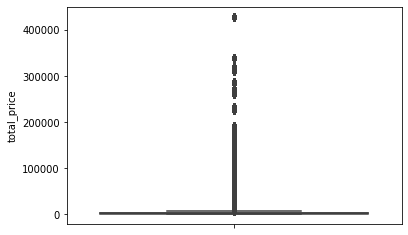

In [23]:
sns.boxplot(y='total_price', data=ambev_churn_available)

### Checking whether our dataset is balanced or unbalanced
From inspection, we can tell our dataset is unbalanced. We have too many Falses.

We will have to stratify it (include the argument stratify) in our train_test_split method below.

In [24]:
ambev_churn_available['is_churn_dummy'].value_counts()

0    163799
1     38714
Name: is_churn_dummy, dtype: int64

### Feature selection

#### Correlation between possible features

We previously noted that branch_id has only 0 values, so we will (kind of) drop it.

In [25]:
ambev_churn_available = ambev_churn_available.loc[:,ambev_churn_available.columns!='branch_id']

Plotting the correlation in a table and a chart:

In [26]:
ambev_churn_available.corr()

,customer_code,sales_channel,seller_code,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,is_churn_dummy
customer_code,1.000000,0.013233,0.061865,0.091020,-0.092976,0.040072,-0.018868,0.039972,-0.006798,-0.025257,0.003977,0.014126,0.014126
sales_channel,0.013233,1.000000,0.198949,-0.084678,-0.189216,-0.021591,-0.005410,-0.047200,-0.027199,0.339710,0.035908,0.174574,0.174574
seller_code,0.061865,0.198949,1.000000,0.013414,-0.078934,0.016409,0.002271,0.016682,-0.002256,0.177283,0.139810,0.083958,0.083958
total_price,0.091020,-0.084678,0.013414,1.000000,0.068231,0.364798,0.002420,0.403057,0.036117,0.098147,0.197388,0.225919,0.225919
order_id,-0.092976,-0.189216,-0.078934,0.068231,1.000000,0.013720,0.039807,0.033266,0.027292,0.030856,0.054439,0.003286,0.003286
quantity,0.040072,-0.021591,0.016409,0.364798,0.013720,1.000000,0.023965,0.812991,0.071001,0.067211,0.102642,0.127041,0.127041
item_code,-0.018868,-0.005410,0.002271,0.002420,0.039807,0.023965,1.000000,0.019297,-0.019215,-0.085219,-0.013839,-0.046554,-0.046554
item_total_price,0.039972,-0.047200,0.016682,0.403057,0.033266,0.812991,0.019297,1.000000,0.143332,0.047220,0.117507,0.133185,0.133185
unit_price,-0.006798,-0.027199,-0.002256,0.036117,0.027292,0.071001,-0.019215,0.143332,1.000000,0.008519,0.040357,0.054271,0.054271
group_code,-0.025257,0.339710,0.177283,0.098147,0.030856,0.067211,-0.085219,0.047220,0.008519,1.000000,0.376356,0.710854,0.710854


<AxesSubplot:>

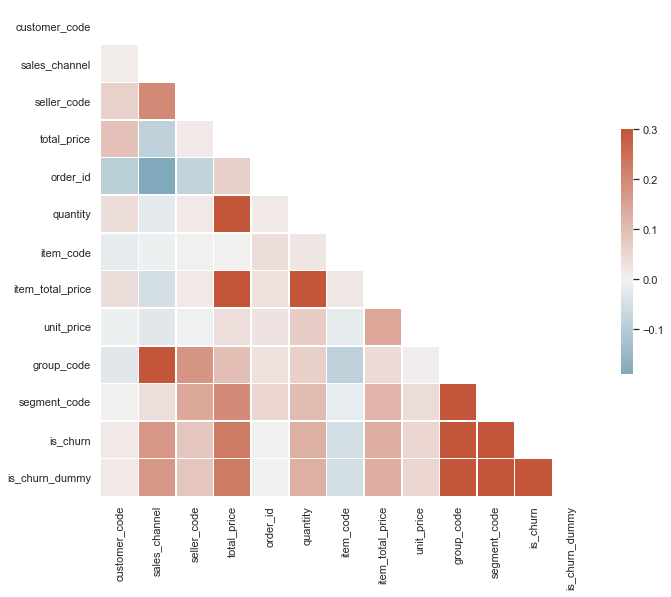

In [27]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = ambev_churn_available.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We noticed some strong correlations:
- *total_price* and *item_total_price*, which is expected since the higher the total value of a product, the higher the total purchase
- *quantity* and *item_total_price* which is expected since the higher amount of the same product, the higher its total value on the order
- *quantity* and *total_price* which is expected since the more you buy, the higher the total value of the order
- *segment_code* and *group_code* which means that some segments have unique groups.

Some interesting correlations that we don't know why:
- *group_code* and *sales_channel*
- *seller_code* and *sales_channel*
- *order_id* and *sales_channel*

Correlations that we can identify as important to predict is_churn in our logistic regression:
- *group_code* and *segment_code* have strong correlation to *is_churn* / is_churn_dummy
- *total_price* have a slight correlation to *is_churn* / *is_churn_dummy

#### Selected features
By the correlation map, we could suggest that *group_code*, *segment_code* and *total_price* are more relevant to determine *is_churn*. However, we don't have data to train on the *group_code* and *segment_code* related to the missing *is_churn* rows. We will have to start with *total_price* only.

In [28]:
X = ambev_churn_available[['total_price']]
y = ambev_churn_available['is_churn_dummy']

In [29]:
X.size

202513

In [30]:
y.size

202513

### Standardizing

In [31]:
scaler = StandardScaler() #instantiating

In [32]:
scaler.fit(X)

StandardScaler()

In [33]:
X_std = scaler.transform(X)

### Holdout
Since we have a very large dataset and we are going for an initial modeling step, we will choose a holdout strategy. Later on, if needed, we will analyze a cross-validation. Cross validations are computational intensive and it doesn't make too much sense using them if we don't know how accurate our first model is yet.

Creating our validation strategy, we will divide our dataset into the data to train and the data to validate:

In [34]:
# split the data into two groups, 20% for validation and 80% for training
# also we will stratify it as in y, since we have unbalanced sets and we don't want to risk separating only Yes or Nos to one of the groups.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=0, test_size=0.2, stratify=y)

In [35]:
X_train, y_train

(array([[-0.18413697],
        [-0.19481438],
        [-0.08124836],
        ...,
        [-0.08367177],
        [-0.14999958],
        [-0.19879068]]),
 159994    0
 156546    0
 32875     1
 201028    0
 123124    0
          ..
 64659     1
 145598    0
 32091     0
 154306    0
 144704    0
 Name: is_churn_dummy, Length: 162010, dtype: uint8)

Now we are going to split even further the X_test and y_test:

In [36]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state=0, test_size=0.2)

### Fitting the model

In [37]:
#importances = pd.DataFrame(zip(model.coef_[0], X_train.columns), columns=['coefs','feature']).sort_values(by='coefs')
#importances

In [38]:
logistic_model = LogisticRegression() #instantiate it

In [39]:
logistic_model.fit(X=X_train, y=y_train) #fitting the model with data

LogisticRegression()

In [40]:
predictions = logistic_model.predict(X_train)

In [41]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [42]:
np.count_nonzero(predictions == 1)

3307

In [43]:
np.count_nonzero(predictions == 0)

158703

In [44]:
np.array(y_train)

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Evaluation
Since our dataset is heavily unbalanced, we can't use the usual score method (which gives us accuracy).

This method will result in the proportion between Yes and No itself and will be of no use.

In [45]:
logistic_model.score(X_train, y_train)

0.8279365471267206

We should focus our evaluation on either Precision, Recall or F-1 Score, depending on what we are after.

For our business case, both false positives and false negatives are equally uninteresting. Thus F1-score will be our evaluation metric.

In [46]:
score = roc_auc_score(y_valid, logistic_model.predict_proba(X_valid)[:, 1])
score

0.40034683215762445

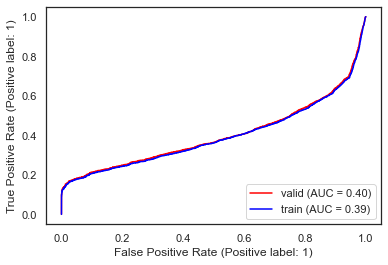

In [47]:
fig, ax = plt.subplots()

plot_roc_curve(logistic_model, X_valid, y_valid, color='red', ax= ax, name='valid')
plot_roc_curve(logistic_model, X_train, y_train, color='blue', ax=ax, name='train')

#### Recall, Precision and F1-Score
Showing the precision, recall and f1 score for our logistic model:

In [48]:
print(classification_report(y_train, logistic_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90    131039
           1       0.97      0.10      0.19     30971

    accuracy                           0.83    162010
   macro avg       0.90      0.55      0.55    162010
weighted avg       0.85      0.83      0.77    162010



In [53]:
#f1_score(y_valid, ['Yes' if i > 0.3 else 'No' for i in logistic_model.predict_proba(X_valid)[:,1]], pos_label="Yes")

In [50]:
#The intercept and coefficients are normallized, so we can't get much of it right now.

#logistic_model.intercept_
#logistic_model.coef_

The decision regions can be graphed:

<AxesSubplot:>

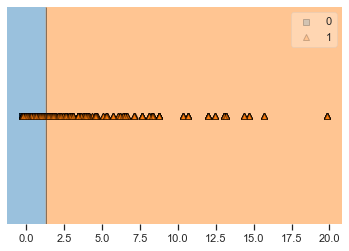

In [62]:
plot_decision_regions(np.array(X_train), 
                      np.array(y_train),
                      logistic_model,
                      scatter_kwargs={'alpha':0.2})